# DNA dataset

## Retrieval

In [1]:
# Module for downloading files
import urllib.request

# Module for handling files
import os.path

In [2]:
# Download train dataset from source
if not os.path.isfile('./dataset/fullset_train.csv'):
    opener = urllib.request.build_opener()
    urllib.request.install_opener(opener)
    urllib.request.urlretrieve('https://raw.githubusercontent.com/NeuroCSUT/ViraMiner/master/data/DNA_data/fullset_train.csv', './dataset/fullset_train.csv')

# Download validation dataset from source
if not os.path.isfile('./dataset/fullset_validation.csv'):
    opener = urllib.request.build_opener()
    urllib.request.install_opener(opener)
    urllib.request.urlretrieve('https://raw.githubusercontent.com/NeuroCSUT/ViraMiner/master/data/DNA_data/fullset_validation.csv', './dataset/fullset_validation.csv')

# Download validation dataset from source
if not os.path.isfile('./dataset/fullset_test.csv'):
    opener = urllib.request.build_opener()
    urllib.request.install_opener(opener)
    urllib.request.urlretrieve('https://raw.githubusercontent.com/NeuroCSUT/ViraMiner/master/data/DNA_data/fullset_test.csv', './dataset/fullset_test.csv')

## Preprocessing

In [3]:
# Module for data analysis
import pandas as pd

In [4]:
# Read train dataset
df_train = pd.read_csv('./dataset/fullset_train.csv', header=None, on_bad_lines='skip')
# Drop features
df_train.drop(0, axis=1, inplace=True)
# Remove duplicates
df_train.drop_duplicates(inplace=True)

# Read validation dataset
df_val = pd.read_csv('./dataset/fullset_validation.csv', header=None, on_bad_lines='skip')
# Drop features
df_val.drop(0, axis=1, inplace=True)
# Remove duplicates
df_val.drop_duplicates(inplace=True)

# Read test dataset
df_test = pd.read_csv('./dataset/fullset_test.csv', header=None, on_bad_lines='skip')
# Drop features
df_test.drop(0, axis=1, inplace=True)
# Remove duplicates
df_test.drop_duplicates(inplace=True)

## Preview

In [5]:
# Show train dataset
df_train

,1,2
0,CAAGCCAAGATTTTCTCGCGTCACACTACTCATGACCATTGTATTA...,0
1,AACGAAGCACGGGCCGAGAGATTGAGGAACCAAGGTCCAGCTCTAG...,0
2,TAGTGGGTGAGGTTTCTATTTCCATAATGATCTCGCCTCAATTACT...,0
3,ATATGACCATTCTTGCAAGGTAACACAGGTACATTTTCACAAAGTG...,0
4,GGTCTTAAAACAACAGAAATTTTTTCCATCACAGTTGCAGAAATTA...,0
...,...,...
211234,TCTTCTTTTTTTTAAAAGTGTTTAGGAAGTTGTAAAATTCATCCAA...,0
211235,AAACCATTTCTGCCTCCCCACTTTCATCATCGTCATGTAAGTCACA...,0
211236,ACGCTCACGTTGGAGATGATGAAAAGAACAAGAAATACGCCGATGA...,0
211237,GCCTTGCCTGTTACATTTTACTTCTTCCAGCAGGGCATGCAGAGAG...,0


In [6]:
# Show validation dataset
df_val

,1,2
0,CTTATCTGTTTCTTACTGAGCATGGTATCCGTGGTGGCCTTGAGGT...,0
1,TAAATAGAAGGAATTGGAGGGACAAACGATGAATGAAGAATTAATG...,1
2,CCCTGGGGATGCCCAAAATGCTCATGGGATGAGGGTATGTGAACTA...,0
3,GCATGCAATAGCCTGGTTGAATCCTGGACACAGCAAACATAGTTTG...,0
4,TTGTTCACAATGAGGCACTTCCAACCCTTTTGATGTCCTCTGACTT...,0
...,...,...
26400,GTGAGCCACTGCACCTGGCCCTGACTGTAATTTTTAAAGACTGTTT...,0
26401,CAGCCTGGCCTAGACCCACATTCAGAAAACAATGGCCCCAGGATAA...,0
26402,CCAGCTAAGAAAGCTCAGGGGCTGGAGAGCTCTGGTACACCACCAC...,0
26403,ATAGCGGGTACTGAGGGGCATTCATGACCACTTTCCTCCACGAAAC...,0


In [7]:
# Show test dataset
df_test

,1,2
0,CCTGGGACCACTGTAGTTGTGGACCATACGGGGCTCTTTCTGTTGA...,0
1,GGCCTGAGCCTCCCAGTTTGGAGTAGGGCCTCTTAAGGAAAAAAGA...,0
2,TGAGCACATATCTGTGGGGCAGGTGGGGAATAAACAGCACAATTAC...,0
3,AACCATGCAGAAGCAAAAATTTTGAGAACATAAGGCCTTCACGAAC...,0
4,GAGATTTGGATGGGAACACAGACAAACCATACAACTAAGGAAACTT...,0
...,...,...
26400,GGCTTGCTGTGAGAAATGAATTTATGAATTCGGTTCTTGCTGAAGC...,0
26401,TTTTGTGACTTGGGTTGTCTTTTGTATTCATTGGTAGGGCAGTCGA...,0
26402,TCTTTCAGGTACATATTGAAATCCCTGTGGATAACTTAGCTATATC...,0
26403,GGGACACCCTGAGCTCGTCTTCTCACCCCTAGCCTTTCTGCTCCCT...,0


## One-hot encoding

### DNA encoding

In [8]:
# Module for numpy vectors
import numpy as np

In [9]:
# One-hot encoding
def one_hot_encode(seq):
    # Make sure seq has only allowed bases
    allowed = set('ACGTN')
    if not set(seq).issubset(allowed):
        invalid = set(seq) - allowed
        raise ValueError(f'Sequence contains chars not in allowed DNA alphabet (ACGTN): {invalid}')
        
    # Dictionary returning one-hot encoding for each nucleotide 
    nuc_d = {'A':[1, 0, 0, 0, 0],
             'C':[0, 1, 0, 0, 0],
             'G':[0, 0, 1, 0, 0],
             'T':[0, 0, 0, 1, 0],
             'N':[0, 0, 0, 0, 1]}
    
    # Create array from nucleotide sequence
    vec = np.array([nuc_d[x] for x in seq])

    # Return one-hot encoding
    return vec

### Dataset encoding

In [10]:
# Install PyTorch
!pip install torch

In [11]:
# Module for learning models
import torch

# Module for data manipulation
from torch.utils.data import Dataset, DataLoader

In [12]:
# Class for one-hot encoding DNA datasets
class DatasetOHE(Dataset):
    
    def __init__(self, df, seq_col=1, target_col=2):
        # Get X sequences from correct column in dataframe
        self.seqs = list(df[seq_col].values)
        self.seq_len = len(self.seqs[0])

        # One-hot encode and stack sequences in torch tensor
        self.ohe_seqs = torch.stack([torch.tensor(one_hot_encode(x)) for x in self.seqs])
    
        # Get Y labels
        self.labels = torch.tensor(list(df[target_col].values)).unsqueeze(1)
        
    def __len__(self):
        # Return sequence length
        return len(self.seqs)
    
    def __getitem__(self, idx):
        # Indexed one-encoded sequence and its label
        seq = self.ohe_seqs[idx]
        label = self.labels[idx]

        # Return extracted element
        return seq, label

In [13]:
# Build one-endoded dataloader from dataframe
def build_dataloader(df, seq_col=1, target_col=2, batch_size=128, shuffle=False):
    # Create dataset
    ds = DatasetOHE(df, seq_col, target_col)
    # Put dataset into data loader
    dl = DataLoader(dataset=ds, batch_size=batch_size, shuffle=shuffle)
    
    return dl

In [14]:
# One-hot encoded dataloader for training
train_dl = build_dataloader(df_train, shuffle=False)

# One-hot encoded dataloader for validation
val_dl = build_dataloader(df_val, shuffle=False)

# One-hot encoded dataloader for test
test_dl = build_dataloader(df_test, shuffle=False)

# Custom branch

## Debug layer

In [15]:
# Module for neural network
import torch.nn as nn

In [16]:
# Debug layer
class DebugLayer(nn.Module):
    
    def __init__(self):
        super(DebugLayer, self).__init__()
    
    def forward(self, x):
        # Print input shape
        print(f'x.shape: {x.shape}')
        # Print input value
        print(f'x: {x}')

        # Return input
        return x

## Inception layer

In [17]:
# Custom inception block
class InceptionLayer(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_1d, kernel_2d):
        super(InceptionLayer,self).__init__()

        # 1st layer from ViraMiner
        self.branch1 = nn.Sequential(
            # 1st sub-layer
            nn.Conv1d(in_channels, out_channels, kernel_1d, stride=1, padding=2),
            
            # Activation function
            nn.ReLU(inplace=True)
        )

        # 1st custom layer
        self.branch2 = nn.Sequential(
            # 1st sub-layer
            nn.Conv2d(1, out_channels, kernel_2d, stride=1, padding=0),
    
            # Activation function
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        # 1st sub-branch
        # Input: 5 channels
        # Input shape: batch, channels, width
        out1 = self.branch1(x)
        
        # 2nd sub-branch
        # Input: 5 channels as 1 channel
        # Input shape: batch, channels, height, width
        out2 = self.branch2(x.unsqueeze(1)).squeeze(2)

        # Return sub-branch concatenation
        out = torch.cat([out1, out2], dim=1)
        return out

## CNN architecture

In [18]:
# CNN custom model
class CustomCNN(nn.Module):
    
    def __init__(self, in_length, in_channels, kernel_1d, kernel_2d, linear_size, dropout):
        super(CustomCNN, self).__init__()

        # Network architecture
        self.custom_cnn = nn.Sequential(
            # 1st layer
            InceptionLayer(in_channels, round(linear_size/2), kernel_1d, kernel_2d),
            
            # 2nd layer
            nn.AvgPool1d(in_length - kernel_2d + 1, stride=1),
            
            # 3rd layer
            nn.Dropout(dropout),
            
            # 4th layer
            nn.Flatten(),
            
            # 5th layer
            nn.Linear(linear_size, linear_size),

            # Activation function
            nn.ReLU(inplace=True),
            
            # 6th layer
            nn.Dropout(dropout),

            # 7th layer
            nn.Linear(linear_size, 1),

            # Activation function
            nn.Sigmoid()
        )

    def forward(self, x):
        # Input shape: batch, sequence length, channels
        x = x.permute(0, 2, 1)

        # Modified input shape: batch, channels, width
        out = self.custom_cnn(x)

        # Return output node
        return out

# Model training

## Hyperparameter

In [19]:
# Sequence features
sequence_length = 300
sequence_channels = 5

# Network features
kernel_1d = 9
kernel_2d = 5
linear_size = 1000
dropout = [0.1, 0.5]

# Training features
learning_rate = [0.01, 0.001, 0.0001]
learning_rate_update = [True, False]
epochs = 10

## Training utilities

### Training core

In [20]:
# Loss function applied to a batch of inputs
def loss_batch(model, loss_func, xb, yb, opt=None):
    # Prediction on given batch
    xb_out = model(xb.float())
    
    # Binary cross entropy
    loss = loss_func(xb_out, yb.float())

    # Count correct predictions
    np_xb_out = xb_out.detach().cpu().numpy().round().astype(int)
    np_yb = yb.detach().cpu().numpy().round().astype(int)
    correct = np.sum(np_xb_out == np_yb)

    # Skip backpropagation if no optimizer
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    # Loss statistics on batch
    return loss.item(), len(xb), correct

### Batch training

In [21]:
# Training over train dataset batches within a epoch
def train_epoch(model, train_dl, loss_func, device, opt):
    # Set model to training mode
    model.train()

    # Train losses, batch sizes, correct predictions per batch
    tl, ns, cp = [], [], []
    
    # loop over train batches
    for xb, yb in train_dl:
        # Put train on GPU
        xb, yb = xb.to(device),yb.to(device)
        
        # Provide optimizer to allow backpropagation
        t, n, c = loss_batch(model, loss_func, xb, yb, opt=opt)
        
        # Collect train loss, batch sizes, correct predictions per batch
        tl.append(t); ns.append(n); cp.append(c)

    # Convert to numpy array
    tl, ns, cp = np.array(tl), np.array(ns), np.array(cp)

    # Losses weighed average over batches
    train_loss = np.average(tl, weights=ns)

    # Accuracy arithmetic average over batches
    train_acc = np.sum(cp) / np.sum(ns)

    # Train statistics on epoch
    return train_loss, train_acc

In [22]:
# Validation over validation dataset batches within a epoch
def val_epoch(model, val_dl, loss_func, device):
    # Set model to evaluation mode
    model.eval()

    # Disable gradient calculation
    with torch.no_grad():
        # Validation losses, batch sizes, correct predictions per batch
        vl, ns, cp = [], [], []
        
        # Loop over validation batches
        for xb, yb in val_dl:
            # Put validation on GPU
            xb, yb = xb.to(device),yb.to(device)

            # Not provide optimizer to deny backpropagation
            v, n, c = loss_batch(model, loss_func, xb, yb)

            # Collect validation loss, batch sizes, correct predictions per batch
            vl.append(v); ns.append(n); cp.append(c)

    # Convert to numpy array
    vl, ns, cp = np.array(vl), np.array(ns), np.array(cp)

    # Losses weighed average over batches
    val_loss = np.average(vl, weights=ns)

    # Accuracy arithmetic average over batches
    val_acc = np.sum(cp) / np.sum(ns)

    # Validation statistics on epoch
    return val_loss, val_acc

### Learning rate update

In [23]:
# Rule for updating learning rate
def lr_update_rule(opt):
    for param in opt.param_groups:
        # Halves optimizer learning rate
        param['lr'] = param['lr'] * 0.5

### Epoch training

In [24]:
# Fit model on train dataset and evaluate model on validation dataset
def fit(epochs, model, loss_func, opt, train_dl, val_dl, device, lr_update):
    # Losses on train and validation dataset
    train_losses, val_losses = [], []

    # Accuracies on train and validation dataset
    train_accuracies, val_accuracies = [], []
    
    # Loop over epochs
    for epoch in range(epochs):
        # Perform training within epoch
        train_loss, train_acc = train_epoch(model,train_dl,loss_func,device,opt)
        train_losses.append(train_loss); train_accuracies.append(train_acc)

        # Perform validation within epoch
        val_loss, val_acc = val_epoch(model,val_dl,loss_func,device)
        val_losses.append(val_loss); val_accuracies.append(val_acc)
        
        # Learning rate update
        if lr_update and (epoch+1)%5 == 0:
            lr_update_rule(opt)

        # Epoch statistics
        print(f'Epoch {epoch+1}/{epochs}\t| train loss: {train_loss} | val loss: {val_loss} | train accuracy: {train_acc} | val accuracy: {val_acc}')

    # Train and validation statistics during model fit
    return train_losses, val_losses, train_accuracies, val_accuracies

## Training start

In [25]:
# Run model train and validation with binary cross entropy and Adam optimizer
def run_model(train_dl, val_dl, model, device, epochs, lr, lr_update, lossf=None, opt=None):
    # Adam optimizer if no optimizer provided
    if opt:
        optimizer = opt
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # Binary cross entropy if no loss function provided
    if lossf:
        loss_func = lossf
    else:
        loss_func = torch.nn.BCELoss()
    
    # Run model fit
    train_losses, val_losses, train_accuracies, val_accuracies = fit(epochs, model, loss_func, optimizer, train_dl, val_dl, device, lr_update)

    # Model fit statistics
    return train_losses, val_losses, train_accuracies, val_accuracies

In [26]:
# Use GPU if available
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
# Create custom branch model and redirect to device
model_cnn = CustomCNN(sequence_length, sequence_channels, kernel_1d, kernel_2d, linear_size, dropout[0])
model_cnn.to(DEVICE)

# Model structure
print(str(model_cnn))

CustomCNN(
  (custom_cnn): Sequential(
    (0): InceptionLayer(
      (branch1): Sequential(
        (0): Conv1d(5, 500, kernel_size=(9,), stride=(1,), padding=(2,))
        (1): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(1, 500, kernel_size=(5, 5), stride=(1, 1))
        (1): ReLU(inplace=True)
      )
    )
    (1): AvgPool1d(kernel_size=(296,), stride=(1,), padding=(0,))
    (2): Dropout(p=0.1, inplace=False)
    (3): Flatten(start_dim=1, end_dim=-1)
    (4): Linear(in_features=1000, out_features=1000, bias=True)
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.1, inplace=False)
    (7): Linear(in_features=1000, out_features=1, bias=True)
    (8): Sigmoid()
  )
)


In [28]:
# Check if exist trained model
if not os.path.isfile('./fcustom_branch.pth'):
    # Run model training with hyperparameter
    cnn_train_losses, cnn_val_losses, cnn_train_accuracies, cnn_val_accuracies = run_model(train_dl, val_dl, model_cnn, DEVICE, epochs, learning_rate[1], learning_rate_update[1])
    # Save trained model
    torch.save(model_cnn.state_dict(), './fcustom_branch.pth')
else:
    # Load trained model
    model_cnn.load_state_dict(torch.load('./fcustom_branch.pth'))

C:\Users\feder\anaconda3\Lib\site-packages\torch\nn\modules\conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


Epoch 1/10	| train loss: 0.09982098389980572 | val loss: 0.09442602613020308 | train accuracy: 0.9786395892885078 | val accuracy: 0.9797711947874839
Epoch 2/10	| train loss: 0.09019622073275663 | val loss: 0.08934133994289398 | train accuracy: 0.9792226630828961 | val accuracy: 0.9797711947874839
Epoch 3/10	| train loss: 0.08560125873176354 | val loss: 0.08503105594191698 | train accuracy: 0.9792226630828961 | val accuracy: 0.9797711947874839
Epoch 4/10	| train loss: 0.08305558272956892 | val loss: 0.08221205611354009 | train accuracy: 0.9792226630828961 | val accuracy: 0.9797711947874839
Epoch 5/10	| train loss: 0.08060289822583742 | val loss: 0.08134646517872987 | train accuracy: 0.9792179226455433 | val accuracy: 0.9798090764451852
Epoch 6/10	| train loss: 0.07811091715003896 | val loss: 0.08157666725088827 | train accuracy: 0.9792748078937763 | val accuracy: 0.9799606030759906
Epoch 7/10	| train loss: 0.07592553090094853 | val loss: 0.08023140264933412 | train accuracy: 0.979421761

# Model performance

## Prediction utilities

In [29]:
# Get batch model predictions
def predict_batch(model, xb, yb):
    # Model predictions for input
    xb_out = model(xb.float())
    
    # Numpy label probabilities, predicted labels and true labels
    np_xb_prob = xb_out.detach().cpu().numpy()
    np_xb_out = xb_out.detach().cpu().numpy().round().astype(int)
    np_yb = yb.detach().cpu().numpy().round().astype(int)

    # Predicted labels and true labels on batch
    return np_xb_prob, np_xb_out, np_yb

In [30]:
# Calculate predictions
def predict(model, dl, device):
    # Set model to evaluation mode
    model.eval()
    
    # Disable gradient calculation
    with torch.no_grad():
        # Predicted labels, true labels
        lp, pl, tl = [], [], []
        
        # Loop over batches
        for xb, yb in dl:
            # Put validation on GPU
            xb, yb = xb.to(device),yb.to(device)

            # Not provide optimizer to deny backpropagation
            l, p, t = predict_batch(model, xb, yb)

            # Label probabilities, predicted labels, true labels per batch
            lp.extend(l), pl.extend(p); tl.extend(t)

    # Predicted labels and true labels on dataset
    return lp, pl, tl

## Learning curve

In [31]:
# Module for plots
import matplotlib.pyplot as plt

In [32]:
# Plot train and val loss over epochs
def loss_plot(data_label_list, loss_type='Binary Cross Entropy Loss'):
    # Plot loss by epoch for each train/validation loss trajectory
    for i, (train_data, val_data, label) in enumerate(data_label_list):    
        plt.plot(train_data, linestyle='--', color=f'C{i}', label=f'{label} Train')
        plt.plot(val_data, color=f'C{i}', label=f'{label} Validation', linewidth=3.0)

    # Plot features
    plt.legend()
    plt.title('Learning Curve')
    plt.ylabel(loss_type)
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

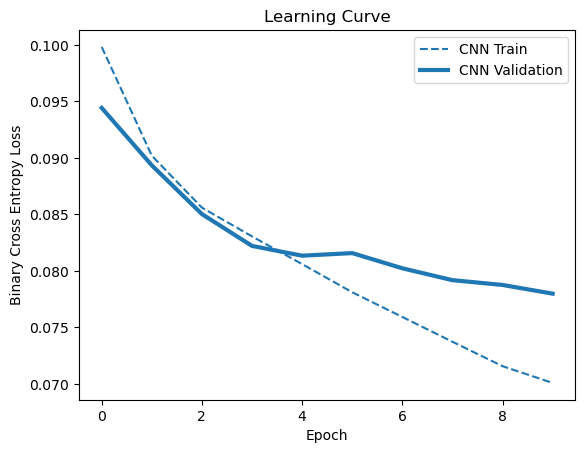

In [33]:
# Plot learning curve
cnn_data_label = (cnn_train_losses, cnn_val_losses, 'CNN')
loss_plot([cnn_data_label])

## Accuracy curve

In [34]:
# Plot train and validation accuracy over epochs
def accuracy_plot(data_label_list, accuracy_type='Accuracy'):
    # Plot accuracy by epoch for each train/validation accuracy trajectory
    for i,(train_data, val_data,label) in enumerate(data_label_list):    
        plt.plot(train_data, linestyle='--',color=f'C{i}', label=f'{label} Train')
        plt.plot(val_data, color=f'C{i}', label=f'{label} Validation', linewidth=3.0)

    # Plot features
    plt.legend()
    plt.title('Accuracy Curve')
    plt.ylabel(accuracy_type)
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

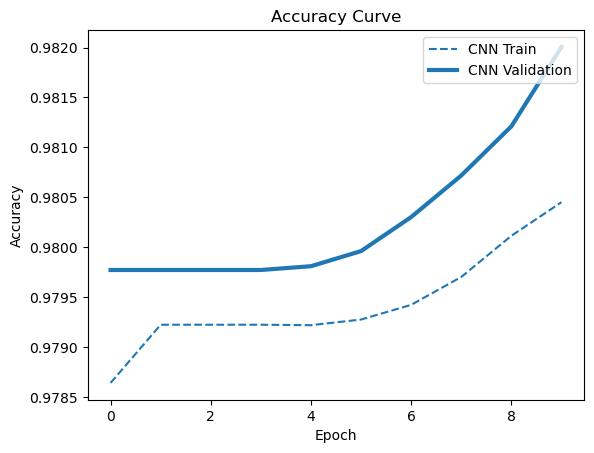

In [35]:
# Plot accuracy curve
cnn_data_label = (cnn_train_accuracies, cnn_val_accuracies, 'CNN')
accuracy_plot([cnn_data_label])

## Model accuracy

In [36]:
def compute_accuracy(pred_labels, true_labels):
    # Flatten lists of arrays
    pred_flat = np.concatenate(pred_labels)
    true_flat = np.concatenate(true_labels)

    # Calculate equality
    tot_sum = np.sum(pred_flat == true_flat)
    tot_len = len(true_flat)

    # Calculate accuracy
    accuracy = tot_sum / tot_len

    # Model accuracy
    return accuracy

In [37]:
# Accuracy over train set
train_prob, train_pred, train_true = predict(model_cnn, train_dl, DEVICE)
train_accuracy = compute_accuracy(train_pred, train_true)

# Print train accuracy
print(f'Train accuracy: {train_accuracy}')

Train accuracy: 0.9820858872439572


In [38]:
# Accuracy over validation set
val_prob, val_pred, val_true = predict(model_cnn, val_dl, DEVICE)
val_accuracy = compute_accuracy(val_pred, val_true)

# Print validation accuracy
print(f'Validation accuracy: {val_accuracy}')

Validation accuracy: 0.982006212591863


In [39]:
# Accuracy over test set
test_prob, test_pred, test_true = predict(model_cnn, test_dl, DEVICE)
test_accuracy = compute_accuracy(test_pred, test_true)

# Print test accuracy
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.9816294837316768


C:\Users\feder\anaconda3\Lib\site-packages\torch\nn\modules\conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


## Confusion matrix

### Train dataset

In [40]:
# Module for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    206568
           1       0.82      0.18      0.29      4383

    accuracy                           0.98    210951
   macro avg       0.90      0.59      0.64    210951
weighted avg       0.98      0.98      0.98    210951



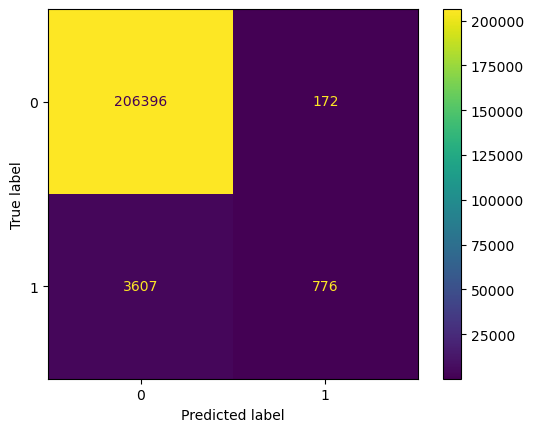

In [41]:
# Plot confusion matrix on train dataset
print(classification_report(train_true, train_pred, zero_division=0))
cm = confusion_matrix(train_true, train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

### Validation dataset

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25864
           1       0.78      0.15      0.26       534

    accuracy                           0.98     26398
   macro avg       0.88      0.58      0.62     26398
weighted avg       0.98      0.98      0.98     26398



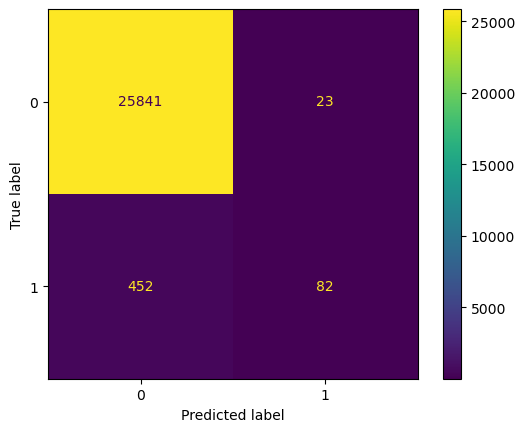

In [42]:
# Plot confusion matrix on validation dataset
print(classification_report(val_true, val_pred, zero_division=0))
cm = confusion_matrix(val_true, val_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

### Test dataset

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25852
           1       0.75      0.17      0.28       549

    accuracy                           0.98     26401
   macro avg       0.87      0.59      0.64     26401
weighted avg       0.98      0.98      0.98     26401



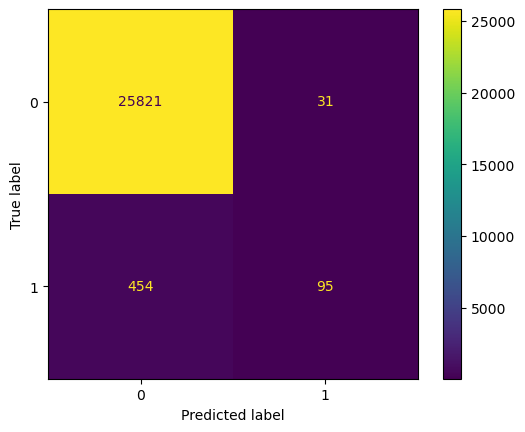

In [43]:
# Plot confusion matrix on test dataset
print(classification_report(test_true, test_pred, zero_division=0))
cm = confusion_matrix(test_true, test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

## True and predicted labels

In [44]:
# Count labels per classes
def count_labels(labels):
    labels_count = {0: 0, 1: 0}
    for v in labels:
        if v[0] == 0:
            labels_count[0] = labels_count[0] + 1
        elif v[0] == 1:
            labels_count[1] = labels_count[1] + 1

    # Count per class
    return labels_count

### Predicted labels

In [45]:
# Count predicted labels over train set
train_pred_count = count_labels(train_pred)
print(f'Train predict 0: {train_pred_count[0]}')
print(f'Train predict 1: {train_pred_count[1]}')

Train predict 0: 210003
Train predict 1: 948


In [46]:
# Count predicted labels over validation set
val_pred_count = count_labels(val_pred)
print(f'Validation predict 0: {val_pred_count[0]}')
print(f'Validation predict 1: {val_pred_count[1]}')

Validation predict 0: 26293
Validation predict 1: 105


In [47]:
# Count predicted labels over test set
test_pred_count = count_labels(test_pred)
print(f'Test predict 0: {test_pred_count[0]}')
print(f'Test predict 1: {test_pred_count[1]}')

Test predict 0: 26275
Test predict 1: 126


### True labels

In [48]:
# Count true labels over train set
train_true_count = count_labels(train_true)
print(f'Train true 0: {train_true_count[0]}')
print(f'Train true 1: {train_true_count[1]}')

Train true 0: 206568
Train true 1: 4383


In [49]:
# Count true labels over validation set
val_true_count = count_labels(val_true)
print(f'Validation true 0: {val_true_count[0]}')
print(f'Validation true 1: {val_true_count[1]}')

Validation true 0: 25864
Validation true 1: 534


In [50]:
# Count true labels over test set
test_true_count = count_labels(test_true)
print(f'Test true 0: {test_true_count[0]}')
print(f'Test true 1: {test_true_count[1]}')

Test true 0: 25852
Test true 1: 549


## ROC curve

In [51]:
# Module for ROC curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

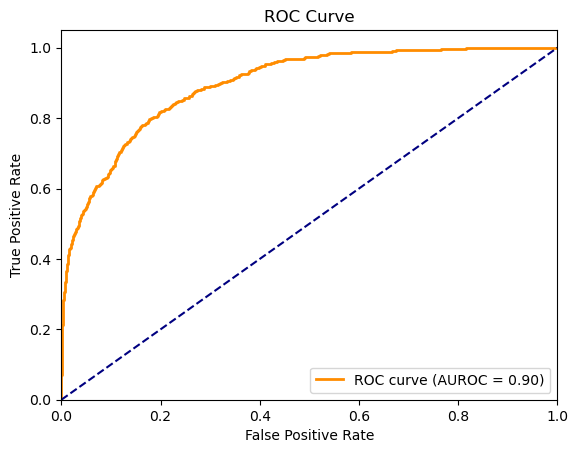

In [52]:
# ROC curve over test dataset
fpr, tpr, thresholds = roc_curve(test_true, test_prob)

# Calculate AUROC
roc_auc = auc(fpr, tpr)

# Plot ROC curve and AUROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUROC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Model validation

In [53]:
# Validation accuracies
val_accuracy = {}

# Training loop
for do in dropout:
    for lr in learning_rate:
        for lr_update in learning_rate_update:
            # Create custom branch model and redirect to device
            model_cnn = CustomCNN(sequence_length, sequence_channels, kernel_1d, kernel_2d, linear_size, do)
            model_cnn.to(DEVICE)
            
            # Construct model filename
            do_str, lr_str, lr_update_str = str(do).replace('0.', ''), str(lr).replace('0.', ''), 'up' if lr_update else 'noup'
            model_filename = f'custom_branch_do_{do_str}_lr_{lr_str}_{lr_update_str}.pth'
            print(f'{model_filename}', end='')
            
            # Check if exist trained model
            if not os.path.isfile(f'./pretrained/{model_filename}'):
                # Model status
                print(' does not exist.')
                # Run model training with hyperparameter
                cnn_train_losses, cnn_val_losses, cnn_train_accuracies, cnn_val_accuracies = run_model(train_dl, val_dl, model_cnn, DEVICE, epochs, lr, lr_update)
                # Save trained model
                torch.save(model_cnn.state_dict(), f'./pretrained/{model_filename}')
            else:
                # Model status
                print(' already exists.')
                # Load trained model
                model_cnn.load_state_dict(torch.load(f'./pretrained/{model_filename}'))
            
            # Dummy print
            print()

            # Accuracy over validation set
            val_prob, val_pred, val_true = predict(model_cnn, val_dl, DEVICE)
            val_accuracy[model_filename] = compute_accuracy(val_pred, val_true)

custom_branch_do_1_lr_01_up.pth already exists.

custom_branch_do_1_lr_01_noup.pth already exists.

custom_branch_do_1_lr_001_up.pth already exists.

custom_branch_do_1_lr_001_noup.pth already exists.

custom_branch_do_1_lr_0001_up.pth already exists.

custom_branch_do_1_lr_0001_noup.pth already exists.

custom_branch_do_5_lr_01_up.pth already exists.

custom_branch_do_5_lr_01_noup.pth already exists.

custom_branch_do_5_lr_001_up.pth already exists.

custom_branch_do_5_lr_001_noup.pth already exists.

custom_branch_do_5_lr_0001_up.pth already exists.

custom_branch_do_5_lr_0001_noup.pth already exists.



In [54]:
# Validation accuracies
print(f'Validation accuracies: {val_accuracy}')

Validation accuracies: {'custom_branch_do_1_lr_01_up.pth': 0.9805667095992121, 'custom_branch_do_1_lr_01_noup.pth': 0.980112129706796, 'custom_branch_do_1_lr_001_up.pth': 0.9808318812031215, 'custom_branch_do_1_lr_001_noup.pth': 0.9824229108265777, 'custom_branch_do_1_lr_0001_up.pth': 0.9797711947874839, 'custom_branch_do_1_lr_0001_noup.pth': 0.9797711947874839, 'custom_branch_do_5_lr_01_up.pth': 0.9797711947874839, 'custom_branch_do_5_lr_01_noup.pth': 0.9797711947874839, 'custom_branch_do_5_lr_001_up.pth': 0.9797711947874839, 'custom_branch_do_5_lr_001_noup.pth': 0.9797711947874839, 'custom_branch_do_5_lr_0001_up.pth': 0.9797711947874839, 'custom_branch_do_5_lr_0001_noup.pth': 0.9797711947874839}


In [55]:
# Model filename with minimum validation accuracy
best_model_filename = max(val_accuracy, key=val_accuracy.get)

# Best model according to validation
print(f'Best model according to validation: {best_model_filename}')

Best model according to validation: custom_branch_do_1_lr_001_noup.pth
